In [ ]:
from dynamodelx import UFA
from sklearn.datasets import make_regression
from dynamodelx.plots import draw_plots

In [28]:
output_dim = 2

X, y  = make_regression(
    n_samples = 1000,
    n_features = 8,
    n_informative = 1,
    n_targets = output_dim
)

In [29]:
ufa = UFA(
    task='regression', 
    model_size='medium', 
    input_dim=X.shape[1],
    output_dim=output_dim,
    loss='mean_square_loss',
    device='cuda',
    custom_architecture=None, 
    weights_init='he', 
    hidden_activation='relu',
    optimizer='adam',
    return_metrics=True,
    auto_build=False, # Model wont't be build, we need to call build() function explicitly.
    multiclass=False,
    uncertainty=False
)

ufa.build()

performance = ufa.train(
                    X=X,
                    y=y,
                    epochs=50,
                    learning_rate=0.01,
                    momentum=None,
                    val_size=0.2,
                    test_size=0.1,
                    batch_size=32
                )

Model Configuration:

  Task:               regression
  Model Size:         medium
  Input Dimension:    8
  Output Dimension:   2
  Loss                mean_square_loss
  Device:             cuda
  Hidden Activation:  relu
  Optimizer:          adam
  Weights Init:       he
  Uncertainty:        False
  Multiclass:         False
  Custom Architecture:None

Building the model ...

===== Built Model =====
Linear(in_features=8, out_features=128, bias=True)
ReLU()
Linear(in_features=128, out_features=64, bias=True)
ReLU()
Linear(in_features=64, out_features=32, bias=True)
ReLU()
Linear(in_features=32, out_features=2, bias=True)

Total parameters: 11,554
Trainable parameters: 11,554
Non-trainable parameters: 0

Model successfully built

Average train loss per sample : 0.09819345116615295 
Average validation loss per sample : 0.33561088144779205

Average test loss per sample: 0.34421041011810305


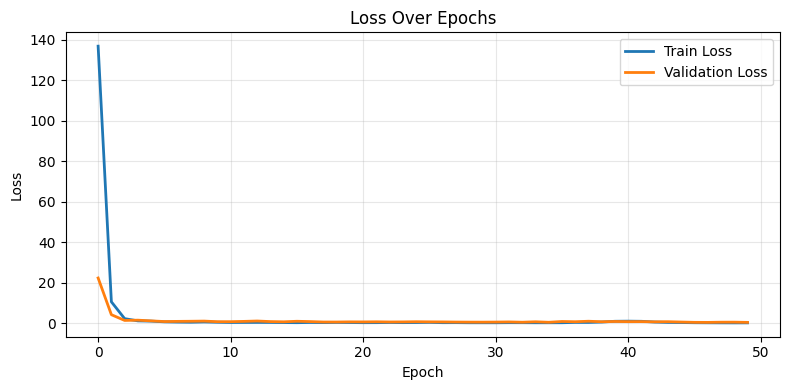

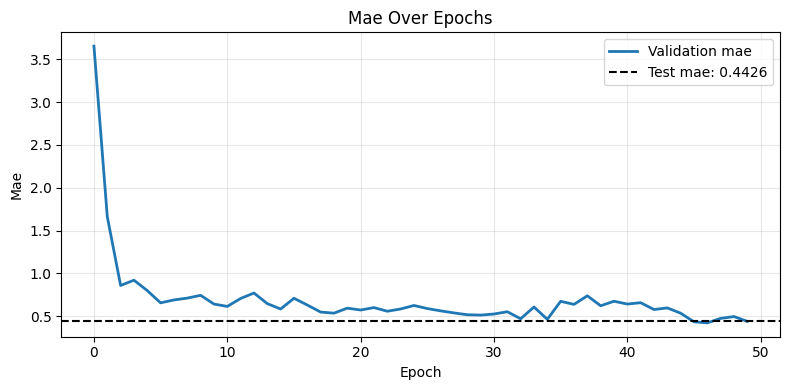

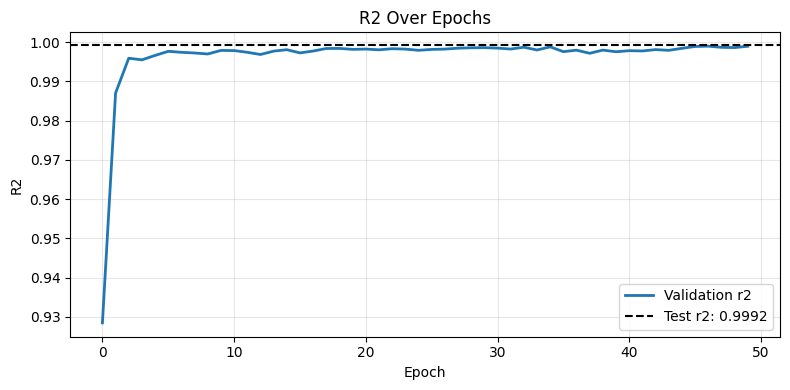

In [30]:
draw_plots(performance)

In [31]:
performance.test

{'test_mae': 0.4426231384277344, 'test_r2': 0.9991917610168457}

In [32]:
predictions = ufa.predict(X[:5])
print(predictions)

[[ 39.10148    35.57695  ]
 [ -6.1305013  -5.523796 ]
 [  5.0009575   4.468783 ]
 [-29.169523  -26.715273 ]
 [ 11.018668   10.196349 ]]


In [33]:
ufa.save(parameters_path='multivariate_regression_params.pt', arguments_path='multivariate_regression_args.pt')

Model's state successfully saved to: multivariate_regression_params.pt
Model's architecture successfully saved to: multivariate_regression_args.pt


In [ ]:
ufa = UFA.load(parameters_path='multivariate_regression_params.pt', arguments_path='multivariate_regression_args.pt')
ufa.predict(X[:5])

{'task': 'regression', 'model_size': 'medium', 'input_dim': 8, 'output_dim': 2, 'loss': 'mean_square_loss', 'device': 'cuda', 'hidden_activation': 'relu', 'optimizer': 'adam', 'custom_architecture': None, 'return_metrics': True, 'auto_build': False, 'X_mean': tensor([ 0.0051, -0.0145, -0.0635, -0.0236,  0.0178,  0.0356,  0.0118, -0.0628]), 'X_std': tensor([0.9876, 0.9875, 0.9768, 0.9625, 0.9826, 1.0108, 1.0455, 1.0096])}
Model Configuration:

  Task:               regression
  Model Size:         medium
  Input Dimension:    8
  Output Dimension:   2
  Loss                mean_square_loss
  Device:             cuda
  Hidden Activation:  relu
  Optimizer:          adam
  Weights Init:       Default
  Uncertainty:        False
  Multiclass:         False
  Custom Architecture:None

Building the model ...

===== Built Model =====
Linear(in_features=8, out_features=128, bias=True)
ReLU()
Linear(in_features=128, out_features=64, bias=True)
ReLU()
Linear(in_features=64, out_features=32, bias

array([[ 39.10148  ,  35.57695  ],
       [ -6.1305013,  -5.523796 ],
       [  5.0009575,   4.468783 ],
       [-29.169523 , -26.715273 ],
       [ 11.018668 ,  10.196349 ]], dtype=float32)